In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE ,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,precision_recall_curve
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold

In [2]:
data= pd.read_csv("EDHS2019.csv",sep=',',index_col='id')

In [3]:
#Preprocessing
#Exploratory Data Analysis

In [4]:
data.sort_index()

,caseid,midx,age_mother,region,place_residence,mother_educ,source_drink_water,toilet_facility,electricity,radio,...,water_piped,toile_improved,electriciti,radioi,televisioni,head_fem,telephonei,wealth_indexi,child_fem,VitaminA
id,,,,,,,,,,,,,,,,,,,,,
3,00010021 02,1,26,tigray,urban,secondary,piped into dwelling,pit latrine with slab,yes,no,...,1,0,1,0,1,0,0,5,1,0
4,00010047 02,1,28,tigray,urban,secondary,piped into dwelling,pit latrine without slab/open pit,yes,no,...,1,0,1,0,1,0,0,5,1,1
5,00010054 02,1,27,tigray,urban,secondary,piped to yard/plot,pit latrine with slab,yes,no,...,1,0,1,0,1,0,0,5,0,1
6,00010060 02,1,32,tigray,urban,higher,piped into dwelling,flush to piped sewer system,yes,yes,...,1,1,1,1,1,0,1,5,1,1
8,00010073 02,1,36,tigray,urban,secondary,piped to yard/plot,pit latrine with slab,yes,no,...,1,0,1,0,1,0,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,00320018 01,3,25,afar,rural,no education,unprotected well,no facility/bush/field,no,no,...,0,0,0,0,0,1,0,1,1,1
5239,00400085 02,3,25,afar,rural,no education,river/dam/lake/ponds/stream/canal/irrigation c...,no facility/bush/field,no,no,...,0,0,0,0,0,0,0,1,1,0
5271,01100010 02,3,25,oromia,rural,no education,protected spring,no facility/bush/field,no,no,...,0,0,0,0,0,0,0,3,1,1


In [5]:
data.shape

(3161, 39)

In [6]:
# Find columns with missing values
missing_cols = data.columns[data.isnull().any()]

In [7]:
print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
Index(['number_anc'], dtype='object')


In [8]:
# Count missing values in each column
missing_values_count = data[missing_cols].isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
number_anc    325
dtype: int64


In [9]:
# Find the mode of the 'number_anc' column to impute missing values
mode_anc = data['number_anc'].mode()[0] 

# Impute missing values in 'number_anc' with the mode
data['number_anc'].fillna(mode_anc, inplace=True) 

C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_19924\2516322516.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['number_anc'].fillna(mode_anc, inplace=True)


In [10]:
print(data.isnull().sum())

caseid                 0
midx                   0
age_mother             0
region                 0
place_residence        0
mother_educ            0
source_drink_water     0
toilet_facility        0
electricity            0
radio                  0
television             0
religion               0
num_under5_children    0
sex_head               0
age_head               0
telephone              0
cooking_fuel           0
wealth_index           0
birth_order            0
sex_child              0
duration_bfeeding      0
numb_month_bf          0
number_anc             0
place_delivery         0
Vitamin_A              0
age_child_months       0
region_i               0
rural                  0
mother_edu             0
water_piped            0
toile_improved         0
electriciti            0
radioi                 0
televisioni            0
head_fem               0
telephonei             0
wealth_indexi          0
child_fem              0
VitaminA               0
dtype: int64


In [11]:
data.isnull().sum().sum()

0

In [12]:
data.columns

Index(['caseid', 'midx', 'age_mother', 'region', 'place_residence',
       'mother_educ', 'source_drink_water', 'toilet_facility', 'electricity',
       'radio', 'television', 'religion', 'num_under5_children', 'sex_head',
       'age_head', 'telephone', 'cooking_fuel', 'wealth_index', 'birth_order',
       'sex_child', 'duration_bfeeding', 'numb_month_bf', 'number_anc',
       'place_delivery', 'Vitamin_A', 'age_child_months', 'region_i', 'rural',
       'mother_edu', 'water_piped', 'toile_improved', 'electriciti', 'radioi',
       'televisioni', 'head_fem', 'telephonei', 'wealth_indexi', 'child_fem',
       'VitaminA'],
      dtype='object')

In [13]:
print(data.head())

             caseid  midx  age_mother  region place_residence mother_educ  \
id                                                                          
3       00010021 02     1          26  tigray           urban   secondary   
4       00010047 02     1          28  tigray           urban   secondary   
5       00010054 02     1          27  tigray           urban   secondary   
6       00010060 02     1          32  tigray           urban      higher   
8       00010073 02     1          36  tigray           urban   secondary   

     source_drink_water                    toilet_facility electricity radio  \
id                                                                             
3   piped into dwelling              pit latrine with slab         yes    no   
4   piped into dwelling  pit latrine without slab/open pit         yes    no   
5    piped to yard/plot              pit latrine with slab         yes    no   
6   piped into dwelling        flush to piped sewer system  

In [14]:
# Drop the non-relevant columns (duplicated, non-numeric forms)
columns_to_drop = ['caseid', 'midx', 'region', 'place_residence', 'mother_educ', 
                  'source_drink_water', 'toilet_facility', 'electricity', 
                  'radio', 'television', 'religion', 'num_under5_children', 
                  'sex_head', 'telephone', 'cooking_fuel', 'wealth_index', 
                  'sex_child', 'duration_bfeeding','numb_month_bf', 'televisioni','Vitamin_A']
data = data.drop(columns=columns_to_drop)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_mother        3161 non-null   int64 
 1   age_head          3161 non-null   int64 
 2   birth_order       3161 non-null   int64 
 3   numb_month_bf     3161 non-null   object
 4   number_anc        3161 non-null   object
 5   place_delivery    3161 non-null   object
 6   Vitamin_A         3161 non-null   object
 7   age_child_months  3161 non-null   int64 
 8   region_i          3161 non-null   int64 
 9   rural             3161 non-null   int64 
 10  mother_edu        3161 non-null   int64 
 11  water_piped       3161 non-null   int64 
 12  toile_improved    3161 non-null   int64 
 13  electriciti       3161 non-null   int64 
 14  radioi            3161 non-null   int64 
 15  televisioni       3161 non-null   int64 
 16  head_fem          3161 non-null   int64 
 17  telephonei        3

In [17]:
## Change object variables into numeric
data['number_anc'] = pd.to_numeric(data['number_anc'], errors='coerce')

In [18]:
#Feature Engineering
# Create a list of values for 'place_delivery' that should be categorized as 'facility_deliv'
facility_deliv_values = [21, 22, 23, 26, 31, 32, 41, 46]

# Create a new column 'facility_deliv' 
data['facility_deliv'] = data['place_delivery'].isin(facility_deliv_values).astype(int)

# Now, 'facility_deliv' will have 1 if 'place_delivery' is in the list, and 0 otherwise.

In [22]:
# Create dummy variables for wealth_index and region
data = pd.get_dummies(data, columns=['wealth_indexi'], prefix='wealth_indexi')
data = pd.get_dummies(data, columns=['region_i'], prefix='region') 

In [19]:
data = data.drop(columns=['place_delivery']) 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   rural             3161 non-null   int64  
 6   mother_edu        3161 non-null   int64  
 7   water_piped       3161 non-null   int64  
 8   toile_improved    3161 non-null   int64  
 9   electriciti       3161 non-null   int64  
 10  radioi            3161 non-null   int64  
 11  head_fem          3161 non-null   int64  
 12  telephonei        3161 non-null   int64  
 13  child_fem         3161 non-null   int64  
 14  VitaminA          3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   bool   
 17  

In [24]:
print(data.index)

Index([   3,    4,    5,    6,    8,    9,   10,   11,   12,   14,
       ...
       5196, 5205, 5208, 5209, 5213, 5218, 5239, 5271, 5321, 5374],
      dtype='int64', name='id', length=3161)


In [30]:
# Save the changes to the dataset
data.to_csv('EDHS2019_Final.csv') 

print("EDHS2019_final.csv has been saved successfully!")

EDHS2019_final.csv has been saved successfully!


In [56]:
# Print summary statistics
data.describe()

,age_mother,age_head,birth_order,number_anc,age_child_months,rural,mother_edu,water_piped,toile_improved,electriciti,radioi,head_fem,telephonei,child_fem,VitaminA,facility_deliv,is_female,took_vita
count,3161.000000,3161.000000,3161.000000,2099.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.0,3161.000000,3161.000000
mean,27.877887,36.540968,3.640620,3.910910,16.907308,0.761784,0.483391,0.458083,0.071813,0.299272,0.241379,0.199304,0.017083,0.493831,0.380576,0.0,0.493831,0.380576
std,6.275653,11.099734,2.377621,1.803283,10.316047,0.426059,0.499803,0.498319,0.258218,0.458012,0.427987,0.399540,0.129602,0.500041,0.485605,0.0,0.500041,0.485605
min,15.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,23.000000,29.000000,2.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,27.000000,35.000000,3.000000,4.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,31.000000,40.000000,5.000000,5.000000,26.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000
max,49.000000,90.000000,15.000000,20.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [32]:
# Create a copy of the DataFrame to avoid modifying the original data
df = data.copy()

# Rename values in the 'VitaminA' column just for the plot
df['VitaminA'] = df['VitaminA'].replace({0: 'No', 1: 'Yes'})
# Rename values in the 'child_fem' column
df['child_fem'] = df['child_fem'].replace({0: 'Male', 1: 'Female'})

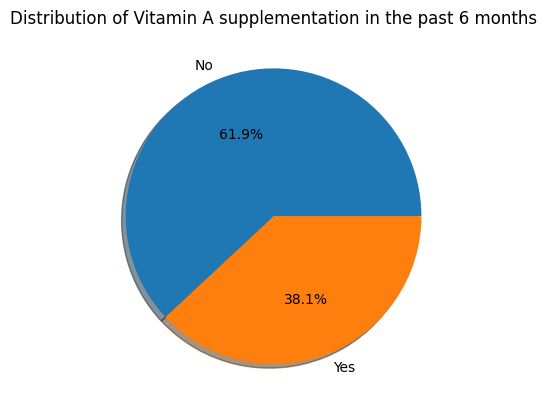

In [33]:
# Create a pie chart of the distribution of Vitamin A supplementation
result_counts = df['VitaminA'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vitamin A supplementation in the past 6 months')
plt.show()

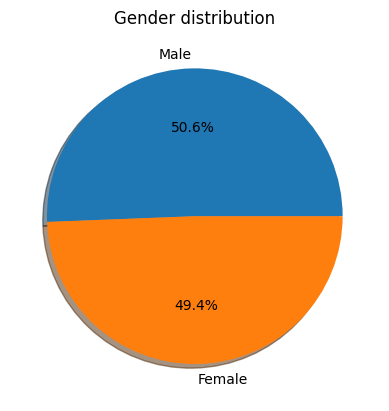

In [34]:
result_counts = df['child_fem'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%',  shadow=True)
plt.title('Gender distribution')
plt.show()

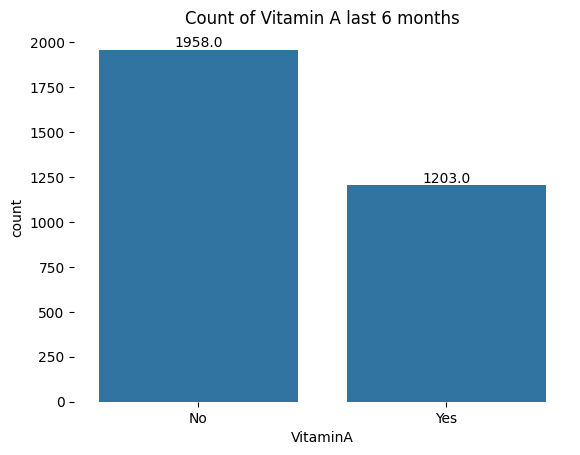

In [35]:
# Plotting the count of Vitamin A supplementation
ax = sns.countplot(x="VitaminA", data=df) 
plt.title('Count of Vitamin A last 6 months')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

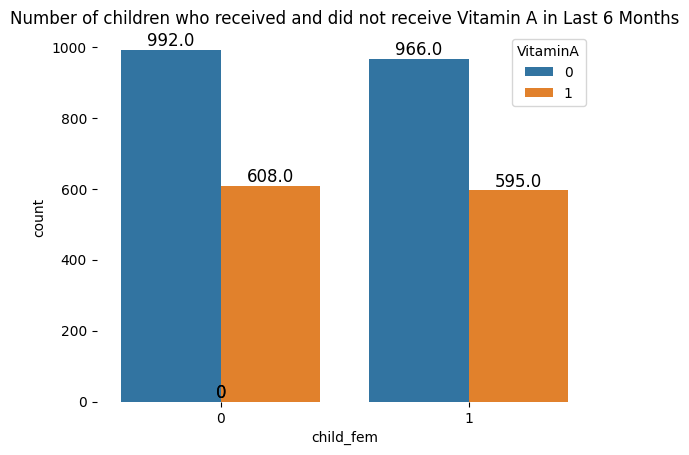

In [186]:
ax = sns.countplot(x='child_fem', hue='VitaminA', data=data)
plt.title('Number of children who received and did not receive Vitamin A in Last 6 Months')

# Add count values to the bars
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f"{height}", 
              xy=(p.get_x() + p.get_width() / 2, height),
              ha='center',
              va='bottom',
              fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

In [36]:
df.info() #Data used to generate the plots (modified child_fem and VitaminA to Object)

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   rural             3161 non-null   int64  
 6   mother_edu        3161 non-null   int64  
 7   water_piped       3161 non-null   int64  
 8   toile_improved    3161 non-null   int64  
 9   electriciti       3161 non-null   int64  
 10  radioi            3161 non-null   int64  
 11  head_fem          3161 non-null   int64  
 12  telephonei        3161 non-null   int64  
 13  child_fem         3161 non-null   object 
 14  VitaminA          3161 non-null   object 
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   bool   
 17  

In [37]:
data.info() #Original data

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   rural             3161 non-null   int64  
 6   mother_edu        3161 non-null   int64  
 7   water_piped       3161 non-null   int64  
 8   toile_improved    3161 non-null   int64  
 9   electriciti       3161 non-null   int64  
 10  radioi            3161 non-null   int64  
 11  head_fem          3161 non-null   int64  
 12  telephonei        3161 non-null   int64  
 13  child_fem         3161 non-null   int64  
 14  VitaminA          3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   bool   
 17  

In [38]:
# Calculate the share of children who took VitaminA by gender
mean_vit_A_by_gender = data.groupby("child_fem")["VitaminA"].mean().round(3)

print(mean_vit_A_by_gender)

child_fem
0    0.380
1    0.381
Name: VitaminA, dtype: float64


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_19924\1847292739.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])
C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_19924\1847292739.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


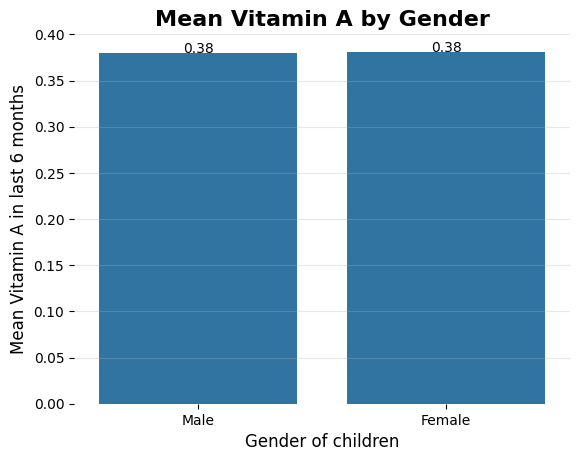

<Figure size 800x600 with 0 Axes>

In [39]:
Vit_A_gender = data.groupby('child_fem')['VitaminA'].mean().reset_index()
# Create the bar plot
ax = sns.barplot(x='child_fem', y='VitaminA', data=Vit_A_gender)

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')
    ax.set_xticklabels(['Male', 'Female'])
    
# Add plot titles and labels
plt.title('Mean Vitamin A by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender of children' , fontsize=12)
plt.ylabel('Mean Vitamin A in last 6 months' , fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

plt.figure(figsize=(8, 6))
# Show the plot
plt.show()

In [40]:
#Statistical test

#T-test
from scipy.stats import ttest_ind

In [41]:
# Vitamin A by gender
male_vitA = data.loc[data['child_fem'] == 0, 'VitaminA']
female_vitA = data.loc[data['child_fem'] == 1, 'VitaminA']

# Compute the t-test statistic and p-value
t_statistic, p_value = ttest_ind(male_vitA, female_vitA)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on impact on the probability of Vitamin A supplementation.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on the probability of Vitamin A supplementation.")

T-Statistic: -0.07
P-Value: 0.946
Fail to reject null hypothesis: Gender has no impact on the probability of Vitamin A supplementation.


In [193]:
#!pip install statsmodels

In [42]:
import statsmodels.api as sm

In [43]:
#ODDS ratio
# Create binary variables for gender and VitA status
data['is_female'] = np.where(data['child_fem'] == 1, 1, 0)
data['took_vita'] = np.where(data['VitaminA'] == 1, 1, 0)

# Fit a logistic regression model with gender and VitA status as predictors
logit_model = sm.Logit(data['took_vita'], sm.add_constant(data['is_female']))
result = logit_model.fit()

# Print the odds ratio for gender
print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))

Optimization terminated successfully.
         Current function value: 0.664345
         Iterations 4
Odds Ratio for Gender: 1.00


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_19924\686604482.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))


In [44]:
#CHI-SQUARE
from scipy.stats import chi2_contingency

In [45]:

# Create a contingency table of gender and VitA status
cont_table = pd.crosstab(data['child_fem'], data['VitaminA'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender and Vitamin A supplementation status are dependent.")
else:
    print("Fail to reject null hypothesis: Gender and Vitamin A supplementation status are independent.")

Chi-Square Statistic: 0.00
P-Value: 0.975
Fail to reject null hypothesis: Gender and Vitamin A supplementation status are independent.


#Feature Selection

In order to improve model's performance and interpretability by reducing the number of less important 
attributes. In supervised ML methods the feature selecction can be done through wrapper, filter and intrinsic. 
The study incorporated correlation, SelectKBest and Extra Tree Classifier.

Correlation
Pearson correlation matrixis is used.

In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        2099 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   rural             3161 non-null   int64  
 6   mother_edu        3161 non-null   int64  
 7   water_piped       3161 non-null   int64  
 8   toile_improved    3161 non-null   int64  
 9   electriciti       3161 non-null   int64  
 10  radioi            3161 non-null   int64  
 11  head_fem          3161 non-null   int64  
 12  telephonei        3161 non-null   int64  
 13  child_fem         3161 non-null   int64  
 14  VitaminA          3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   bool   
 17  

In [ ]:
# Find the mode of the 'number_anc' column to impute missing values
mode_anc = data['number_anc'].mode()[0] 

# Impute missing values in 'number_anc' with the mode
data['number_anc'].fillna(mode_anc, inplace=True) 

In [59]:
data.sort_index()

,age_mother,age_head,birth_order,number_anc,age_child_months,rural,mother_edu,water_piped,toile_improved,electriciti,...,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,is_female,took_vita
id,,,,,,,,,,,,,,,,,,,,,
3,26,30,1,6.0,2,0,1,1,0,1,...,False,False,False,False,False,False,False,False,1,0
4,28,30,2,3.0,25,0,1,1,0,1,...,False,False,False,False,False,False,False,False,1,1
5,27,36,3,7.0,8,0,1,1,0,1,...,False,False,False,False,False,False,False,False,0,1
6,32,40,3,5.0,21,0,1,1,1,1,...,False,False,False,False,False,False,False,False,1,1
8,36,40,6,6.0,13,0,1,1,0,1,...,False,False,False,False,False,False,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,25,25,1,4.0,29,1,0,0,0,0,...,False,False,False,False,False,False,False,False,1,1
5239,25,38,1,4.0,29,1,0,0,0,0,...,False,False,False,False,False,False,False,False,1,0
5271,25,50,1,4.0,31,1,0,0,0,0,...,True,False,False,False,False,False,False,False,1,1


In [48]:
#corr_matrix = data.corr().round(2)
# plot the correlation matrix using a heatmap from seaborn
#sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
#plt.title('Correlation Matrix', fontweight='bold')
#plt.show()

In [62]:
# Convert columns with True and False to 1 and 0
columns_to_convert = ['wealth_indexi_1', 'wealth_indexi_2', 'wealth_indexi_3', 
                     'wealth_indexi_4', 'wealth_indexi_5', 'region_1', 'region_2', 
                     'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 
                     'region_8', 'region_9', 'region_10', 'region_11']

# Replace True with 1 and False with 0
data[columns_to_convert] = data[columns_to_convert].astype(int) 

# Print the updated DataFrame (for verification)
print(data[columns_to_convert]) 

      wealth_indexi_1  wealth_indexi_2  wealth_indexi_3  wealth_indexi_4  \
id                                                                         
3                   0                0                0                0   
4                   0                0                0                0   
5                   0                0                0                0   
6                   0                0                0                0   
8                   0                0                0                0   
...               ...              ...              ...              ...   
5218                1                0                0                0   
5239                1                0                0                0   
5271                0                0                1                0   
5321                1                0                0                0   
5374                0                0                0                0   

      wealt

In [66]:
# Print the column names
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_mother        3161 non-null   int64  
 1   age_head          3161 non-null   int64  
 2   birth_order       3161 non-null   int64  
 3   number_anc        3161 non-null   float64
 4   age_child_months  3161 non-null   int64  
 5   rural             3161 non-null   int64  
 6   mother_edu        3161 non-null   int64  
 7   water_piped       3161 non-null   int64  
 8   toile_improved    3161 non-null   int64  
 9   electriciti       3161 non-null   int64  
 10  radioi            3161 non-null   int64  
 11  head_fem          3161 non-null   int64  
 12  telephonei        3161 non-null   int64  
 13  child_fem         3161 non-null   int64  
 14  VitaminA          3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   int32  
 17  

In [69]:
print(data.VitaminA)

id
3       0
4       1
5       1
6       1
8       1
       ..
5218    1
5239    0
5271    1
5321    1
5374    1
Name: VitaminA, Length: 3161, dtype: int64


In [70]:
print(df.columns.tolist())

['age_mother', 'age_head', 'birth_order', 'number_anc', 'age_child_months', 'rural', 'mother_edu', 'water_piped', 'toile_improved', 'electriciti', 'radioi', 'head_fem', 'telephonei', 'child_fem', 'VitaminA', 'facility_deliv', 'wealth_indexi_1', 'wealth_indexi_2', 'wealth_indexi_3', 'wealth_indexi_4', 'wealth_indexi_5', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11']


VitaminA            1.000000
age_child_months    0.274067
mother_edu          0.095808
region_3            0.089460
wealth_indexi_5     0.081797
age_mother          0.077767
electriciti         0.076798
region_6            0.074326
wealth_indexi_3     0.073488
region_1            0.069918
water_piped         0.069214
region_8            0.061020
region_11           0.056732
toile_improved      0.049489
telephonei          0.042483
Name: VitaminA, dtype: float64


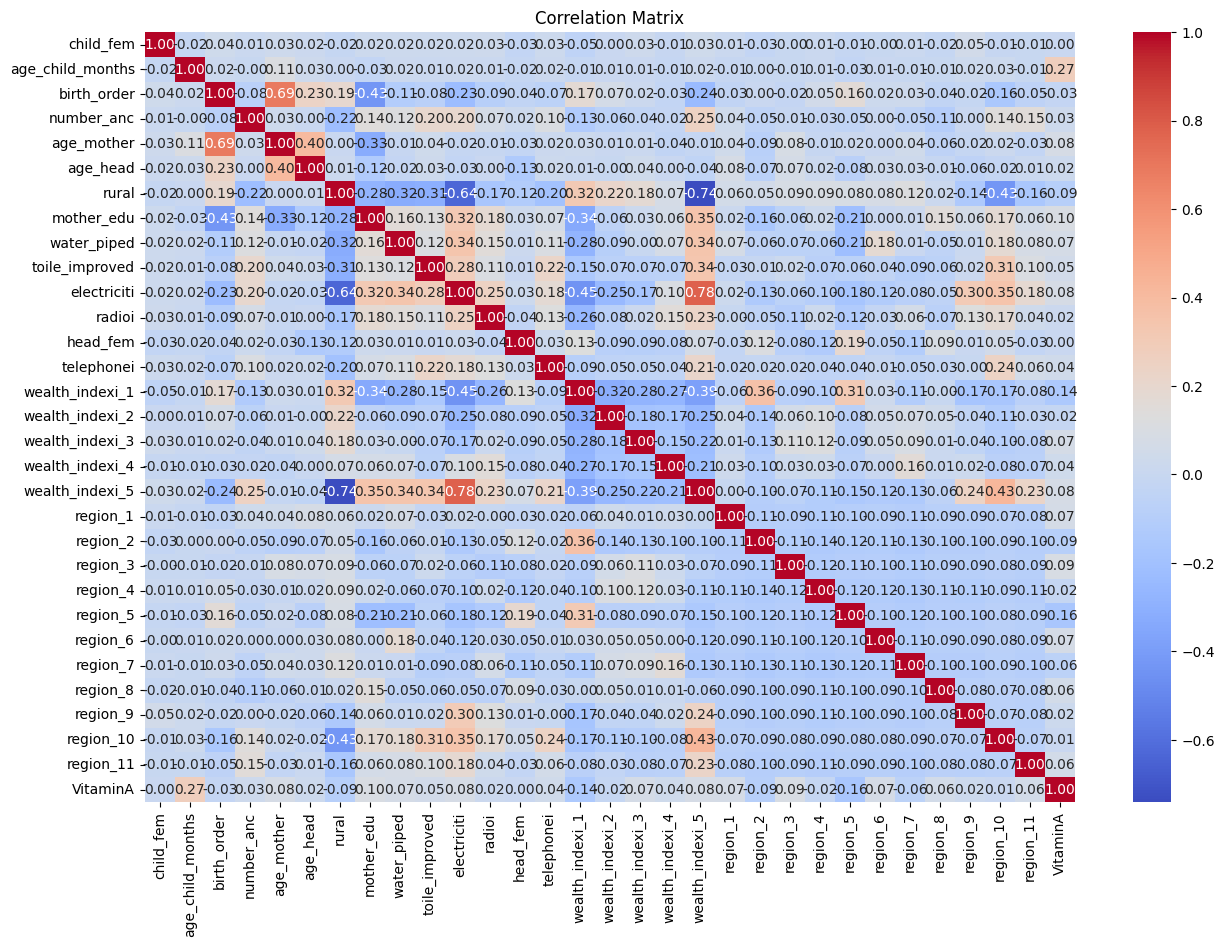

In [74]:
# Select variables of interest
import pandas as pd
variables = ['child_fem', 'age_child_months', 'birth_order', 'number_anc', 
             'age_mother', 'age_head', 'rural', 'mother_edu', 'water_piped', 
             'toile_improved', 'electriciti', 'radioi', 'head_fem', 'telephonei', 
             'wealth_indexi_1', 'wealth_indexi_2', 'wealth_indexi_3', 
             'wealth_indexi_4', 'wealth_indexi_5', 'region_1', 'region_2', 'region_3', 
             'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 
             'region_9', 'region_10', 'region_11','VitaminA']
# Calculate correlation matrix (assuming 'VitaminA' exists)
correlation_matrix = data[variables].corr()

# Sort the correlations for the 'VitaminA' column in descending order
vitamin_a_correlations = correlation_matrix['VitaminA'].sort_values(ascending=False)

# Get the top 10 correlations
top_10_correlations = vitamin_a_correlations.head(15)

print(top_10_correlations)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#SelectKBest

In [76]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming your data is stored in a DataFrame named 'data'

# Select independent and target columns (replace 0:5 with actual column indices)
X = data.iloc[:, 0:5]  # Independent columns (features)
y = data.iloc[:, 5]    # Target variable

# Define a range of k values to evaluate (number of features to select)
k_values = range(2, 6)  # Try k values from 2 to 5 (inclusive)

# Initialize variables to track best k and score
best_k = None
best_score = float('-inf')  # Negative infinity to ensure initial max score

for k in k_values:
    # Create a SelectKBest object with chi-square scoring
    selector = SelectKBest(score_func=chi2, k=k)

    # Fit the selector on the data
    selector.fit(X, y)

    # Get feature scores
    feature_scores = selector.scores_

    # Calculate total score (sum of individual feature scores)
    score = np.sum(feature_scores)

    # Update best_k and best_score if a better score is found
    if score > best_score:
        best_k = k
        best_score = score

# Print results
print(f"The best number of features (k) is {best_k} with a total score of {best_score}.")

# Get top k features based on the best k value
top_k_features = X.columns[selector.get_support(indices=True)]

# Print the top k features
print(f"Top {best_k} predictor features based on chi-square test:")
print(top_k_features.tolist())

The best number of features (k) is 2 with a total score of 267.9824029368815.
Top 2 predictor features based on chi-square test:
['age_mother', 'age_head', 'birth_order', 'number_anc', 'age_child_months']


In [ ]:
#Extremely Randomized Trees.

In [77]:
# Extremely Randomized Trees.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [78]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.22114917 0.24757211 0.12160129 0.14088411 0.26879333]


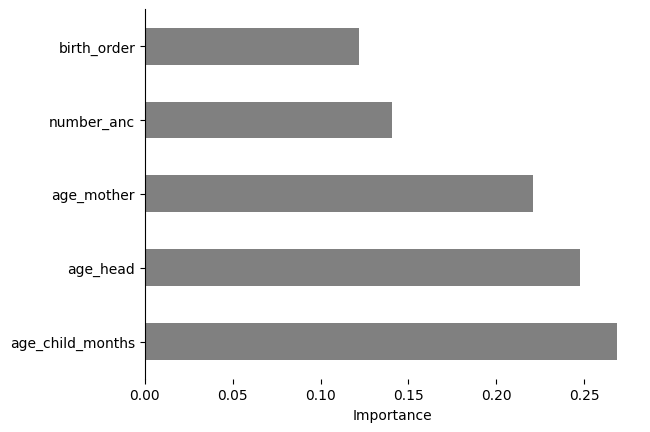

<Figure size 640x480 with 0 Axes>

In [80]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(5).plot(kind='barh', color='#808080')
plt.xlabel('Importance')
# plt.title('Top 3 Features Importance', fontweight='bold', fontsize=12)

# Remove spines
sns.despine(left=False, bottom=True)
plt.show()
plt.savefig('Top2Feature.jpg')

So 'age_mother', 'age_head', 'birth_order', 'number_anc', 'age_child_months' are important feature. So we will be using these feature for our model.
Now we know these 5 variables are the best features for the model.

In [201]:
#Splitting data into Training and Testing samples

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. We split 70% of data as training data and the rest 20% is used as testing data.

In [82]:
data.columns

Index(['age_mother', 'age_head', 'birth_order', 'number_anc',
       'age_child_months', 'rural', 'mother_edu', 'water_piped',
       'toile_improved', 'electriciti', 'radioi', 'head_fem', 'telephonei',
       'child_fem', 'VitaminA', 'facility_deliv', 'wealth_indexi_1',
       'wealth_indexi_2', 'wealth_indexi_3', 'wealth_indexi_4',
       'wealth_indexi_5', 'region_1', 'region_2', 'region_3', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'region_9', 'region_10',
       'region_11', 'is_female', 'took_vita'],
      dtype='object')

In [109]:
X = data.drop(['wealth_indexi_1','region_1', 'is_female', 'took_vita'],axis=1) #Since the best features alone were not able to predict highly, I include more features
Y = data['VitaminA']

In [110]:
X

,age_mother,age_head,birth_order,number_anc,age_child_months,rural,mother_edu,water_piped,toile_improved,electriciti,...,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11
id,,,,,,,,,,,,,,,,,,,,,
3,26,30,1,6.0,2,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,28,30,2,3.0,25,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,27,36,3,7.0,8,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,32,40,3,5.0,21,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,36,40,6,6.0,13,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,25,25,1,4.0,29,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5239,25,38,1,4.0,29,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5271,25,50,1,4.0,31,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
y

id
3       0
4       1
5       1
6       1
8       1
       ..
5218    1
5239    0
5271    1
5321    1
5374    1
Name: VitaminA, Length: 3161, dtype: int64

In [111]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=101)

In [112]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (2528, 30)
y_train -  (2528,)
X_test -  (633, 30)
y_test -  (633,)


Baseline for models
We will train four types of classifiers and decide which classifier will be more effective in detecting anemic condition.

We will use: Classification Models

Logistic Regression
Decision Trees
Random Forest
Naive Bayes Classifier
SVM
Model Building
We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [114]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
# Predict from Test set
y_pred = logreg.predict(X_test)

In [116]:
# Model Evolution
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       230

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633



In [117]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :1.00000
AUC : 1.00000
Precision : 1.00000
Recall : 1.00000
F1 : 1.00000




In [118]:
## Predicted values counts for VitaA as No and Yes of test dataset
pd.Series(y_pred).value_counts()

0    403
1    230
Name: count, dtype: int64

In [119]:
# Actual values counts for Vita A as No and Yes of test dataset
pd.Series(y_test).value_counts()

VitaminA
0    403
1    230
Name: count, dtype: int64

In [120]:
#Model Evolution Matrix
# confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[403,   0],
       [  0, 230]], dtype=int64)

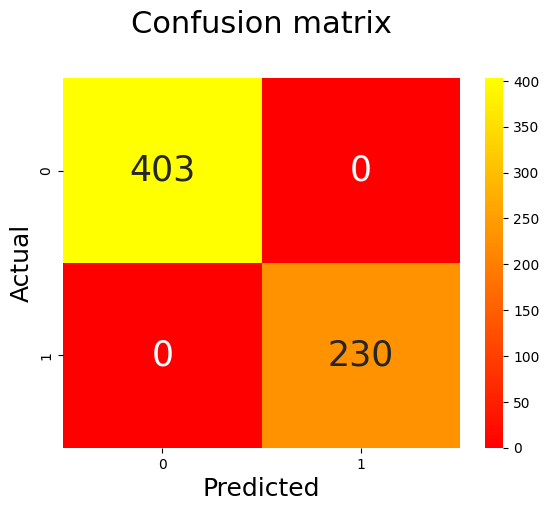

In [121]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

In [122]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.00691366, 0.99308634],
       [0.00958995, 0.99041005],
       [0.99587562, 0.00412438],
       ...,
       [0.99570585, 0.00429415],
       [0.98988979, 0.01011021],
       [0.99541483, 0.00458517]])

In [123]:
!pip install imblearn


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
# Import imbalace technique algorithims

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
#Logistic Regression with Random Undersampling technique

from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 973, 1: 973})


In [125]:
from sklearn.metrics import cohen_kappa_score 

In [126]:
# Undersampling with Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_rus)))

Accuracy :1.00000
AUC : 1.00000
Precision : 1.00000
Recall : 1.00000
F1 : 1.00000
Kappa Statistic : 1.00000


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC -  1.0 



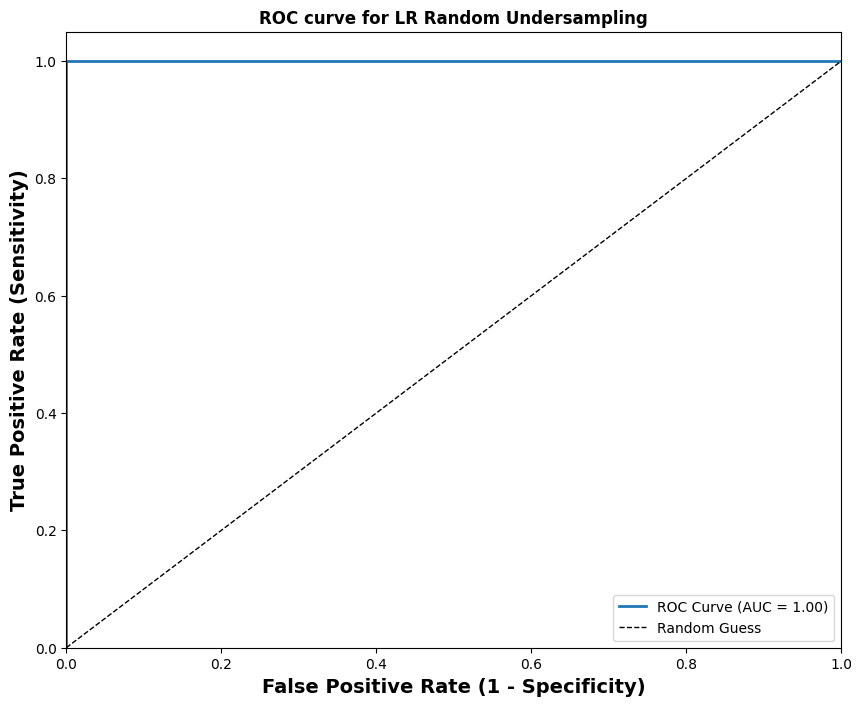

In [127]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=1.000


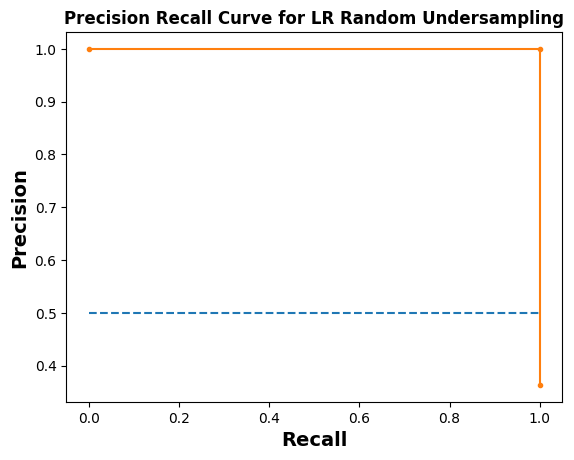

In [128]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# show the plot
plt.show()

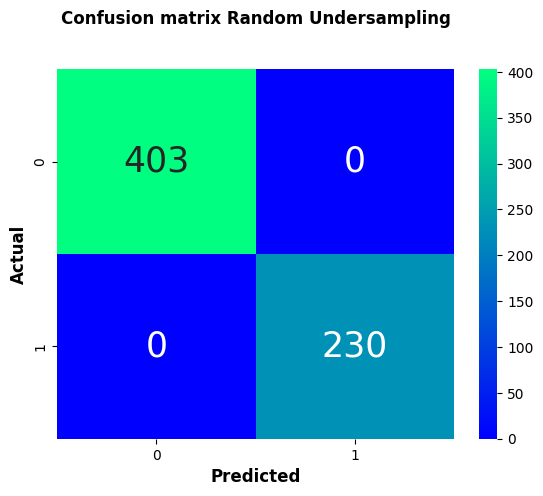

In [129]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix Random Undersampling', y=1.1, fontsize = 12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12, fontweight='bold')
plt.ylabel('Actual',fontsize = 12, fontweight='bold')

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

In [130]:
#Logistic Regression with Random Oversampling technique

In [131]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 1555, 1: 1555})


In [132]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_ros)))

Accuracy :1.00000
AUC : 1.00000
Precision : 1.00000
Recall : 1.00000
F1 : 1.00000
Kappa Statistic : 1.00000


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC -  1.0 



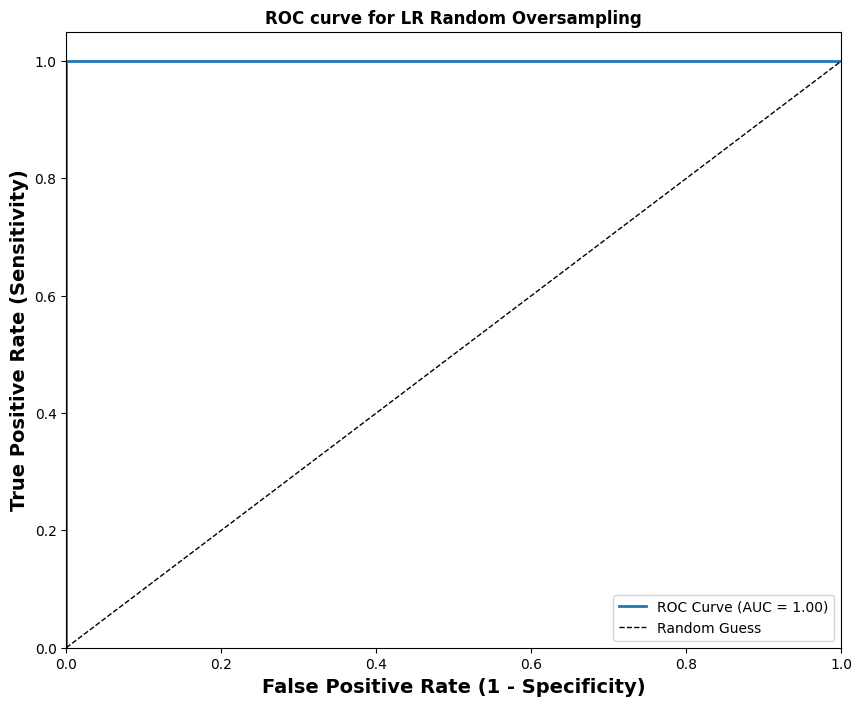

In [133]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Oversampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=1.000


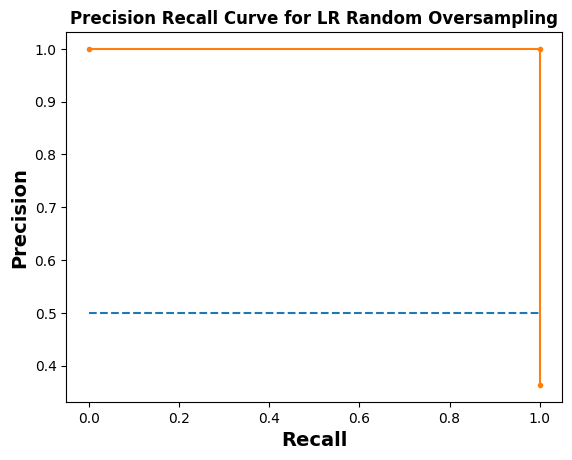

In [134]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')


# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Oversampling', fontsize=12, fontweight='bold')
# show the plot
plt.show()

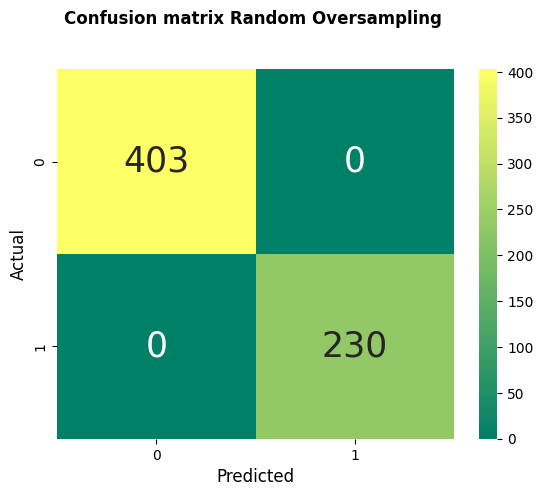

In [135]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="summer" ,fmt='g')

plt.title('Confusion matrix Random Oversampling ', y=1.1,  fontsize=12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

In [ ]:
#Logistic Regression with SMOTE data

In [136]:
from imblearn.over_sampling import SMOTE, ADASYN


print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 1555, 1: 1555})


In [137]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [138]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_smote)))

Accuracy :1.00000
AUC : 1.00000
Precision : 1.00000
Recall : 1.00000
F1 : 1.00000
Kappa Statistic : 1.00000


AUC -  1.0 



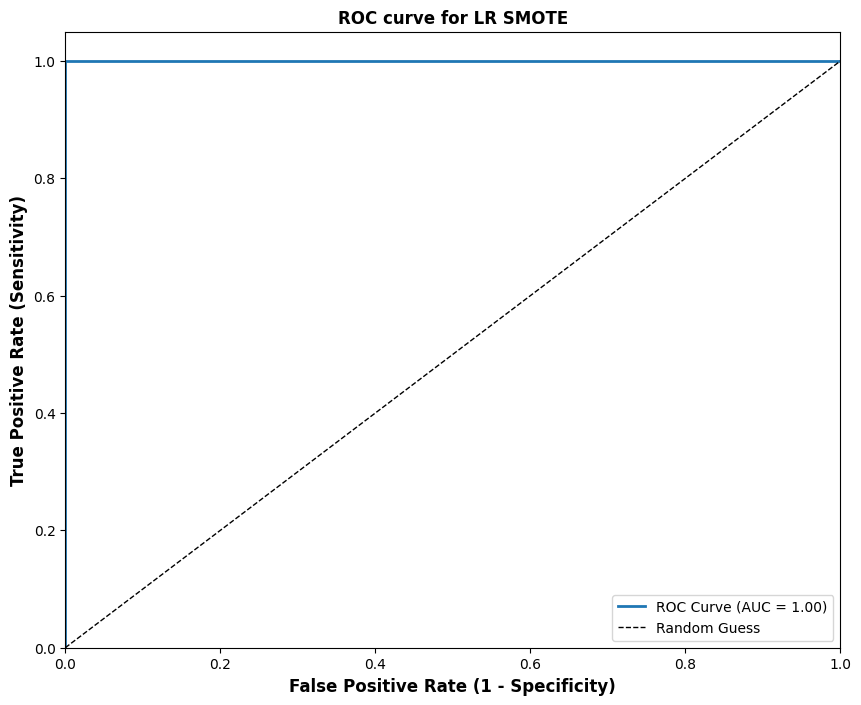

In [139]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)',  fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)',  fontsize=12, fontweight='bold')
plt.title('ROC curve for LR SMOTE',  fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=1.000


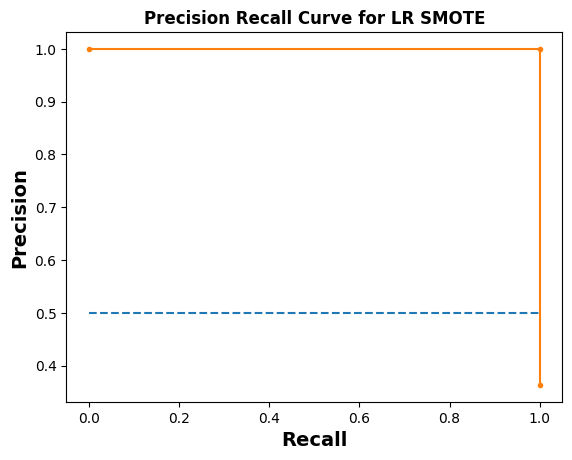

In [140]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR SMOTE', fontsize=12, fontweight='bold')
# show the plot
plt.show()

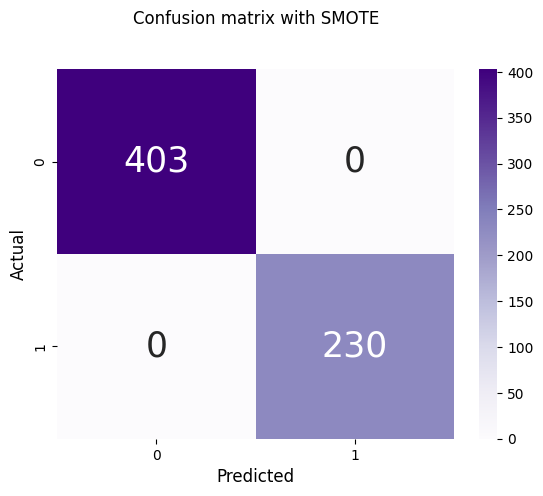

In [141]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Purples" ,fmt='g')

plt.title('Confusion matrix with SMOTE', y=1.1, fontsize = 12)
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)



plt.show()

In [142]:
#Logistic Regression with ADASYN data

In [143]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 1555, 1: 973})
Resampled dataset shape Counter({0: 1555, 1: 1475})


In [144]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_adasyn)))

Accuracy :1.00000
AUC : 1.00000
Precision : 1.00000
Recall : 1.00000
F1 : 1.00000
Kappa Statistic : 1.00000


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC -  1.0 



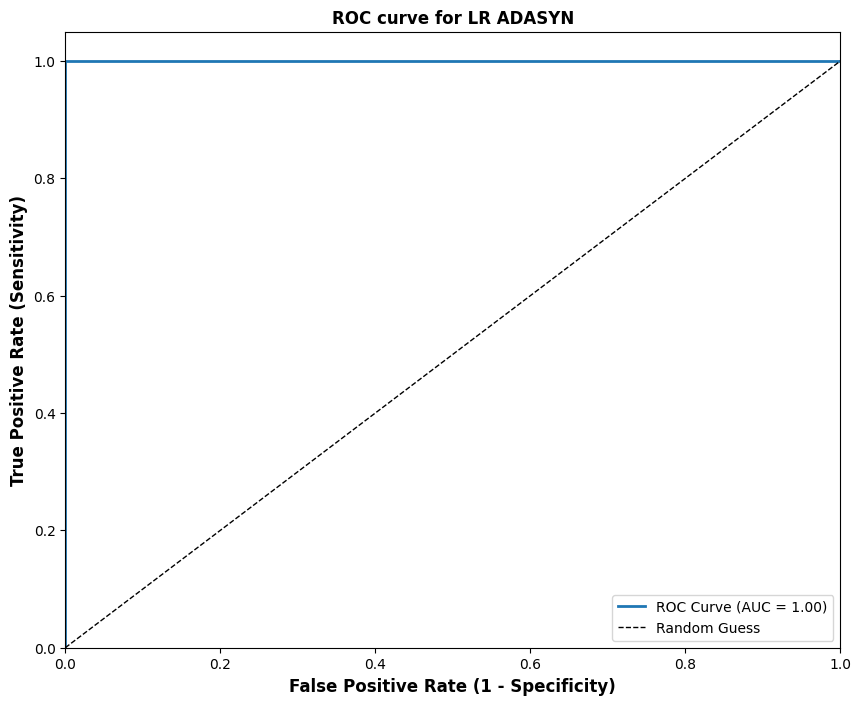

In [145]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12,fontweight='bold')
plt.title('ROC curve for LR ADASYN', fontsize=12,fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()

f1=1.000


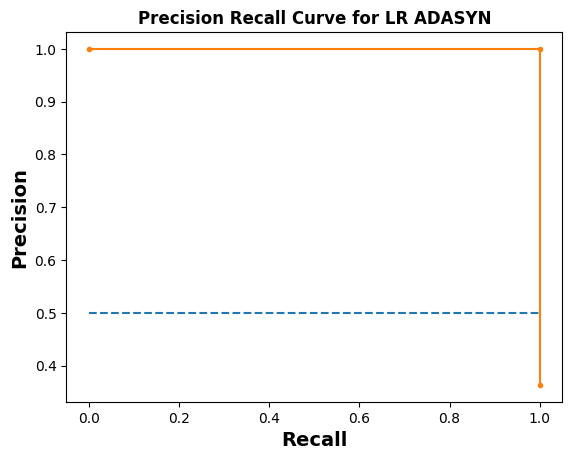

In [146]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_adasyn)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR ADASYN', fontsize=12, fontweight='bold')

# show the plot
plt.show()

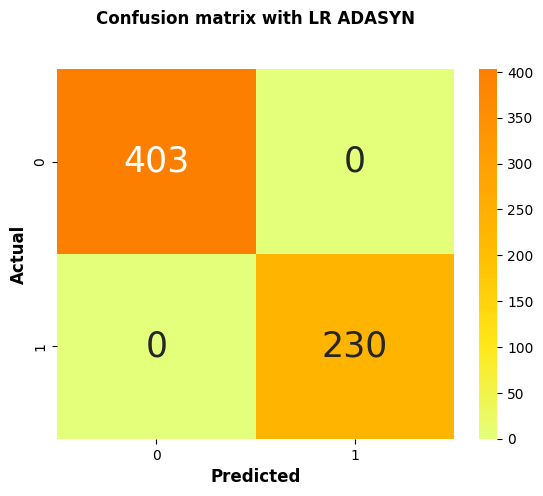

In [147]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Wistia" ,fmt='g')

plt.title('Confusion matrix with LR ADASYN', y=1.1, fontsize = 12,fontweight='bold')
plt.xlabel('Predicted',fontsize = 12,fontweight='bold')
plt.ylabel('Actual',fontsize = 12,fontweight='bold')


plt.show()

Distribution of balaced dataset
Building different models with different balanced datasets
Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

In [148]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []
kappa_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)
         #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))
        
        
        # calculate kappa Statictis
        kappa = cohen_kappa_score(y_test, y_test_pred)
        kappa_lst.append(kappa)

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)
        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        
        print('Kappa Statistic : {0:0.5f}'.format(kappa))
        
        print('Confusion Matrix : \n', cnf_matrix)
        
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    #plt.title('ROC curve for Predicting a anemia cases')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [149]:
#Decision Tree (DT)

In [150]:
from sklearn.tree import DecisionTreeClassifier

Model Name : DT imbalance
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[403   0]
 [  0 230]]


Model Name : DT Undersampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[403   0]
 [  0 230]]


Model Name : DT Oversampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[403   0]
 [  0 230]]


Model Name : DT SMOTE
Train Accuracy :1.00

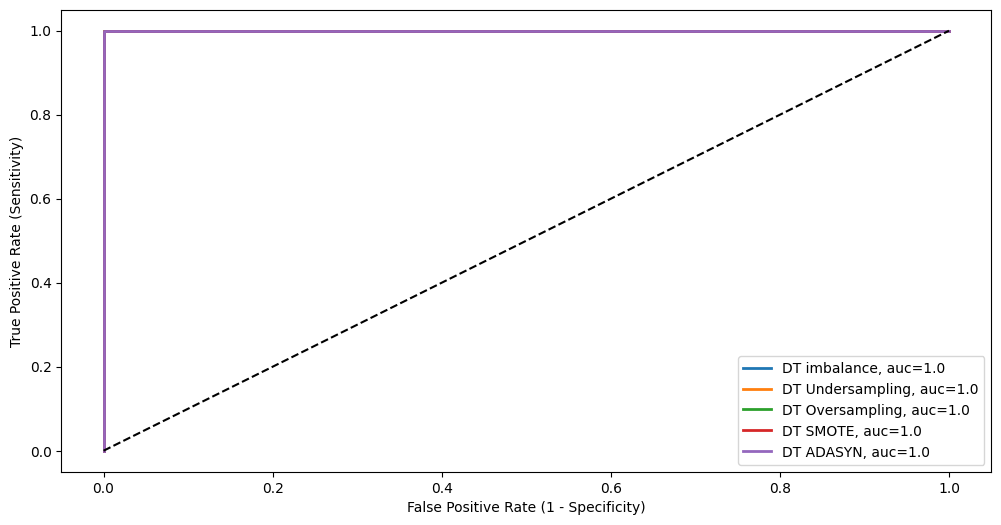

In [151]:
# Decision Tree (DT)
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', dt,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', dt,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Random Forest (RF)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[403   0]
 [  0 230]]


Model Name : RF Undersampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[403   0]
 [  0 230]]


Model Name : RF Oversampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[403   0]
 [  0 230]]


Model Name : RF SMOTE
Train Accuracy :1.00

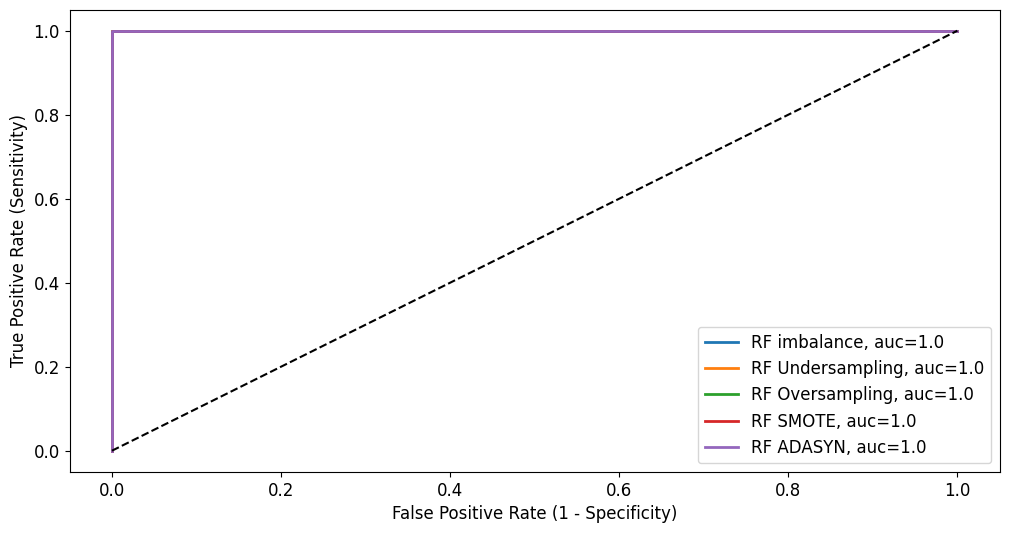

In [152]:
# Random Forest (RF) 
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

K-Nearest Neighbors (KNN)

In [153]:
from sklearn.neighbors import KNeighborsClassifier

Model Name : KNN imbalance
Train Accuracy :0.80775
Test Accuracy :0.67299
Train AUC : 0.78238
Test AUC : 0.62652
Train Precision : 0.79659
Test Precision : 0.56150
Train Recall : 0.67215
Test Recall : 0.45652
Train F1 : 0.72910
Test F1 : 0.50360
Kappa Statistic : 0.26363
Confusion Matrix : 
 [[321  82]
 [125 105]]


Model Name : KNN Undersampling
Train Accuracy :0.79394
Test Accuracy :0.65877
Train AUC : 0.79394
Test AUC : 0.65269
Train Precision : 0.80490
Test Precision : 0.52536
Train Recall : 0.77595
Test Recall : 0.63043
Train F1 : 0.79016
Test F1 : 0.57312
Kappa Statistic : 0.29280
Confusion Matrix : 
 [[272 131]
 [ 85 145]]


Model Name : KNN Oversampling
Train Accuracy :0.83569
Test Accuracy :0.64929
Train AUC : 0.83569
Test AUC : 0.63684
Train Precision : 0.82262
Test Precision : 0.51515
Train Recall : 0.85595
Test Recall : 0.59130
Train F1 : 0.83895
Test F1 : 0.55061
Kappa Statistic : 0.26527
Confusion Matrix : 
 [[275 128]
 [ 94 136]]


Model Name : KNN SMOTE
Train Accuracy :

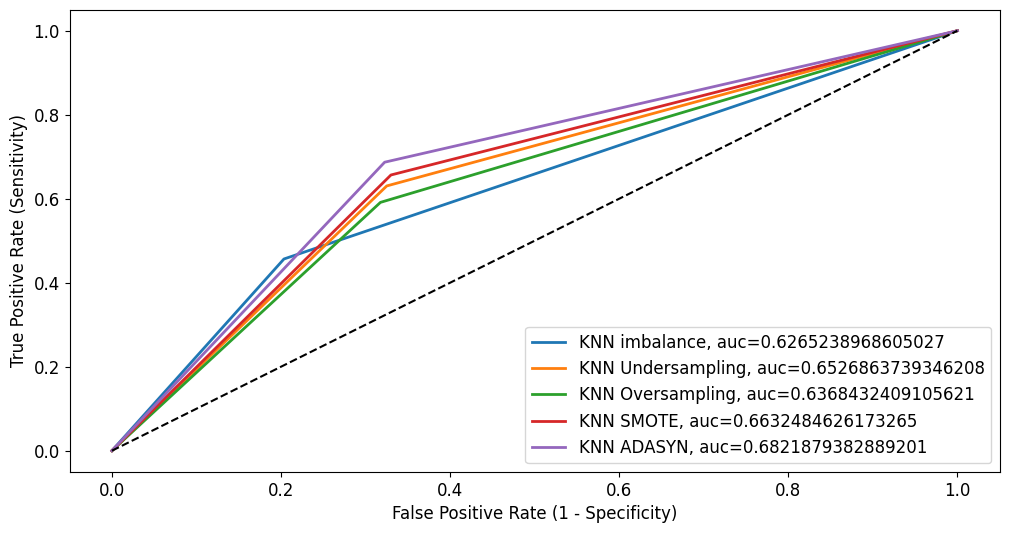

In [154]:
# K-Nearest Neighbors (KNN) 
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

Support Vector Machines SVM

In [155]:
from sklearn.svm import SVC

Model Name : SVM imbalance
Train Accuracy :0.97745
Test Accuracy :0.89731
Train AUC : 0.97186
Test AUC : 0.88016
Train Precision : 0.99353
Test Precision : 0.89100
Train Recall : 0.94758
Test Recall : 0.81739
Train F1 : 0.97002
Test F1 : 0.85261
Kappa Statistic : 0.77404
Confusion Matrix : 
 [[380  23]
 [ 42 188]]


Model Name : SVM Undersampling
Train Accuracy :0.97174
Test Accuracy :0.85940
Train AUC : 0.97174
Test AUC : 0.86158
Train Precision : 0.97417
Test Precision : 0.77220
Train Recall : 0.96917
Test Recall : 0.86957
Train F1 : 0.97166
Test F1 : 0.81800
Kappa Statistic : 0.70411
Confusion Matrix : 
 [[344  59]
 [ 30 200]]


Model Name : SVM Oversampling
Train Accuracy :0.99003
Test Accuracy :0.90047
Train AUC : 0.99003
Test AUC : 0.89571
Train Precision : 0.98909
Test Precision : 0.85232
Train Recall : 0.99100
Test Recall : 0.87826
Train F1 : 0.99004
Test F1 : 0.86510
Kappa Statistic : 0.78628
Confusion Matrix : 
 [[368  35]
 [ 28 202]]


Model Name : SVM SMOTE
Train Accuracy :

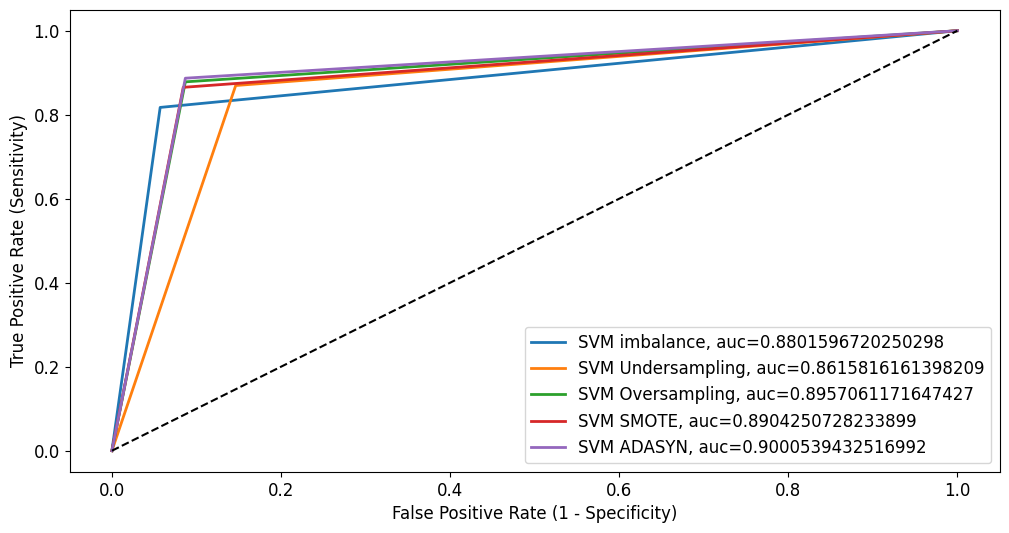

In [156]:
 # Support Vector Machines (SVM)
SVMmodels = []

SVMmodels.append(('SVM imbalance', SVC(gamma='auto'),X_train,y_train,X_test,y_test))
SVMmodels.append(('SVM Undersampling', SVC(gamma='auto'),X_train_rus,y_train_rus,X_test,y_test))
SVMmodels.append(('SVM Oversampling', SVC(gamma='auto'),X_train_ros,y_train_ros,X_test,y_test))
SVMmodels.append(('SVM SMOTE', SVC(gamma='auto'),X_train_smote,y_train_smote,X_test,y_test))
SVMmodels.append(('SVM ADASYN', SVC(gamma='auto'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(SVMmodels)

Performance measures of various classifiers

In [157]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst,
       'Kappa Stat' : kappa_lst
       }



print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data)
performance_df = performance_df.round(3)
finaltable = performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)
finaltable

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test,Kappa Stat
0,DT imbalance,1.000,1.000,1.000,1.000,1.000,1.000
1,DT Undersampling,1.000,1.000,1.000,1.000,1.000,1.000
2,DT Oversampling,1.000,1.000,1.000,1.000,1.000,1.000
3,DT SMOTE,1.000,1.000,1.000,1.000,1.000,1.000
4,DT ADASYN,1.000,1.000,1.000,1.000,1.000,1.000
5,RF imbalance,1.000,1.000,1.000,1.000,1.000,1.000
6,RF Undersampling,1.000,1.000,1.000,1.000,1.000,1.000
7,RF Oversampling,1.000,1.000,1.000,1.000,1.000,1.000
8,RF SMOTE,1.000,1.000,1.000,1.000,1.000,1.000
9,RF ADASYN,1.000,1.000,1.000,1.000,1.000,1.000


In [158]:
!pip install openpyxl


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [159]:
# Export the DataFrame to an Excel file
finaltable.to_excel('my_table.xlsx', index=False)

After training each of the models, above result were obtained.

Looking at the ROC graphs we see DT and RF in any balancing technique have best capture True Positives. This means we capture more Vitamin A supp use. So BT and RF with any balnacing technique is our final model, as this gives highest F1 score of 100% and above on test datasets.